## Credit card approval

### Content

<ol>
<li>Description</li>
<li>Data Gathering</li>
<li>Data Assessment</li>
<li>Data Visualization</li>
<li>Features transformation</li>
<li> Machine Learning</li>
<li>Making predictions and evaluating performance</li>
<li>Finding the best performing model</li>
</ol>

### 1. Description

A <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval"> Credit Card Approval dataset</a> from the UCI Machine Learning Repository will be use to develop automatic credit card approval predictor using machine learning techniques.

Analysis Task:
<ol>
<li>Load and view the dataset.</li>
<li>Exploratory data analysis</li>
<li>Preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>Build a machine learning model that can predict if an individual's application for a credit card will be accepted</li>

### 2. Data Gathering

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import warnings
%matplotlib inline

In [2]:
# Load dataset
data = pd.read_csv ("cc_approvals.data", header = None)

### 3. Data Assessment

In [3]:
# Inspect data
data.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [4]:
data.count()

0     690
1     690
2     690
3     690
4     690
5     690
6     690
7     690
8     690
9     690
10    690
11    690
12    690
13    690
14    690
15    690
dtype: int64

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
#Rename columns
data.columns = ["Gender", "Age", "Debt", "Married", "BankCustomer",
                "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault",
                "Employed", "CreditScore", "DriversLicense", "Citizen", "ZipCode",
                "Income", "ApprovalStatus"]

In [7]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [8]:
# Print summary statistics
data.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


### 4. Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

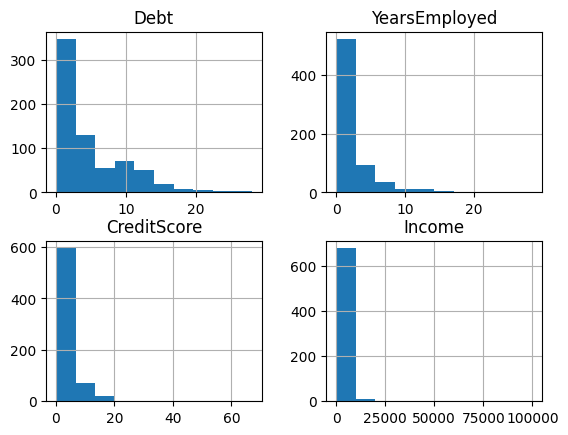

In [9]:
data.hist()
plt.show

/var/folders/yw/mzp2w4m96rqbl1kryp4p9t180000gn/T/ipykernel_18621/3532454593.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='viridis')


<AxesSubplot: >

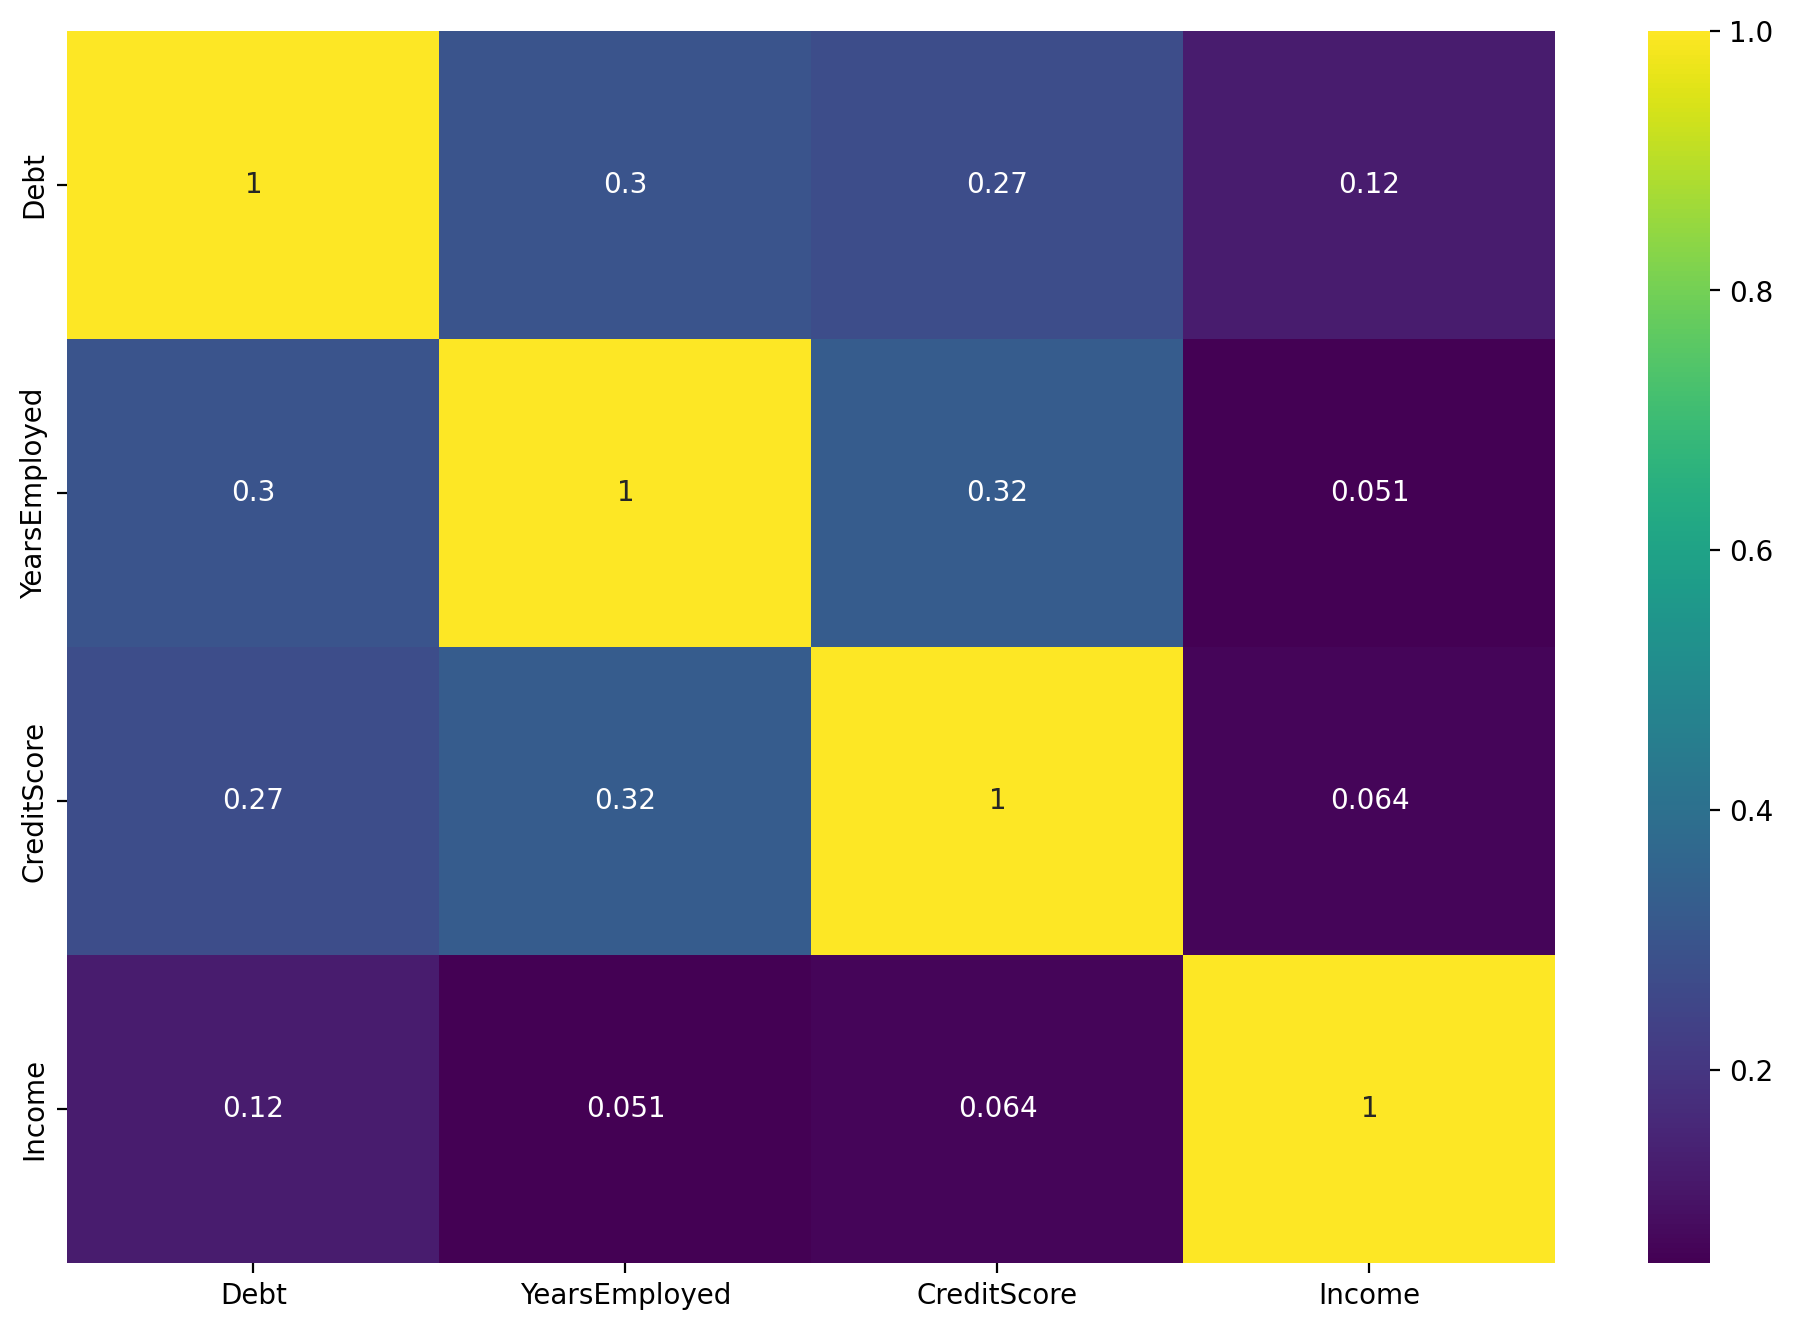

In [10]:
#Data correlation
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [11]:
data.groupby(data.ApprovalStatus).size()

ApprovalStatus
+    307
-    383
dtype: int64

### 5. Features transformation

In [12]:
#Features DriversLicense and ZipCode are not as important as the other
#features in the dataset for predicting credit card approvals.
data2=data.drop (["DriversLicense", "ZipCode"], axis=1)

In [13]:
# Inspect missing values in the dataset
data2.tail(20)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,g,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,g,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,g,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,g,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,g,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,g,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,g,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,g,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,g,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,g,0,-


In [14]:
data2.replace("?", np.NaN, inplace = True)

In [15]:
data2.tail(20)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,g,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,g,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,g,117,-
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,g,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,g,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,g,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,g,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,g,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,g,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,g,0,-


In [16]:
data2.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
Citizen            0
Income             0
ApprovalStatus     0
dtype: int64

In [17]:
### Handling the missing values
imputer = SimpleImputer(missing_values = np.nan, 
                        strategy ='mean')
data2['Debt'] = imputer.fit_transform(data2[['Debt']])
data2['YearsEmployed'] = imputer.fit_transform(data2[['YearsEmployed']])
data2['CreditScore'] = imputer.fit_transform(data2[['CreditScore']])
data2['Income'] = imputer.fit_transform(data2[['Income']])

In [18]:
#Encode categorical features
lb = LabelEncoder()
objList = data2.select_dtypes(include = "object").columns

In [19]:
for obj in objList:
    data2[obj] = lb.fit_transform(data2[obj].astype(str))

In [20]:
data2.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,0.713043,150.528986,4.758725,2.221739,0.728986,6.081159,5.678261,2.223406,0.523188,0.427536,2.40000,0.176812,1017.385507,0.555072
std,0.489635,96.188946,4.978163,0.455691,1.278561,4.629911,2.966326,3.346513,0.499824,0.495080,4.86294,0.557869,5210.102598,0.497318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,71.000000,1.000000,2.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,133.500000,2.750000,2.000000,0.000000,6.000000,8.000000,1.000000,1.000000,0.000000,0.00000,0.000000,5.000000,1.000000
75%,1.000000,226.000000,7.207500,2.000000,0.000000,11.000000,8.000000,2.625000,1.000000,1.000000,3.00000,0.000000,395.500000,1.000000
max,2.000000,349.000000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,2.000000,100000.000000,1.000000


In [21]:
data2.dtypes

Gender              int64
Age                 int64
Debt              float64
Married             int64
BankCustomer        int64
EducationLevel      int64
Ethnicity           int64
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore       float64
Citizen             int64
Income            float64
ApprovalStatus      int64
dtype: object

<AxesSubplot: >

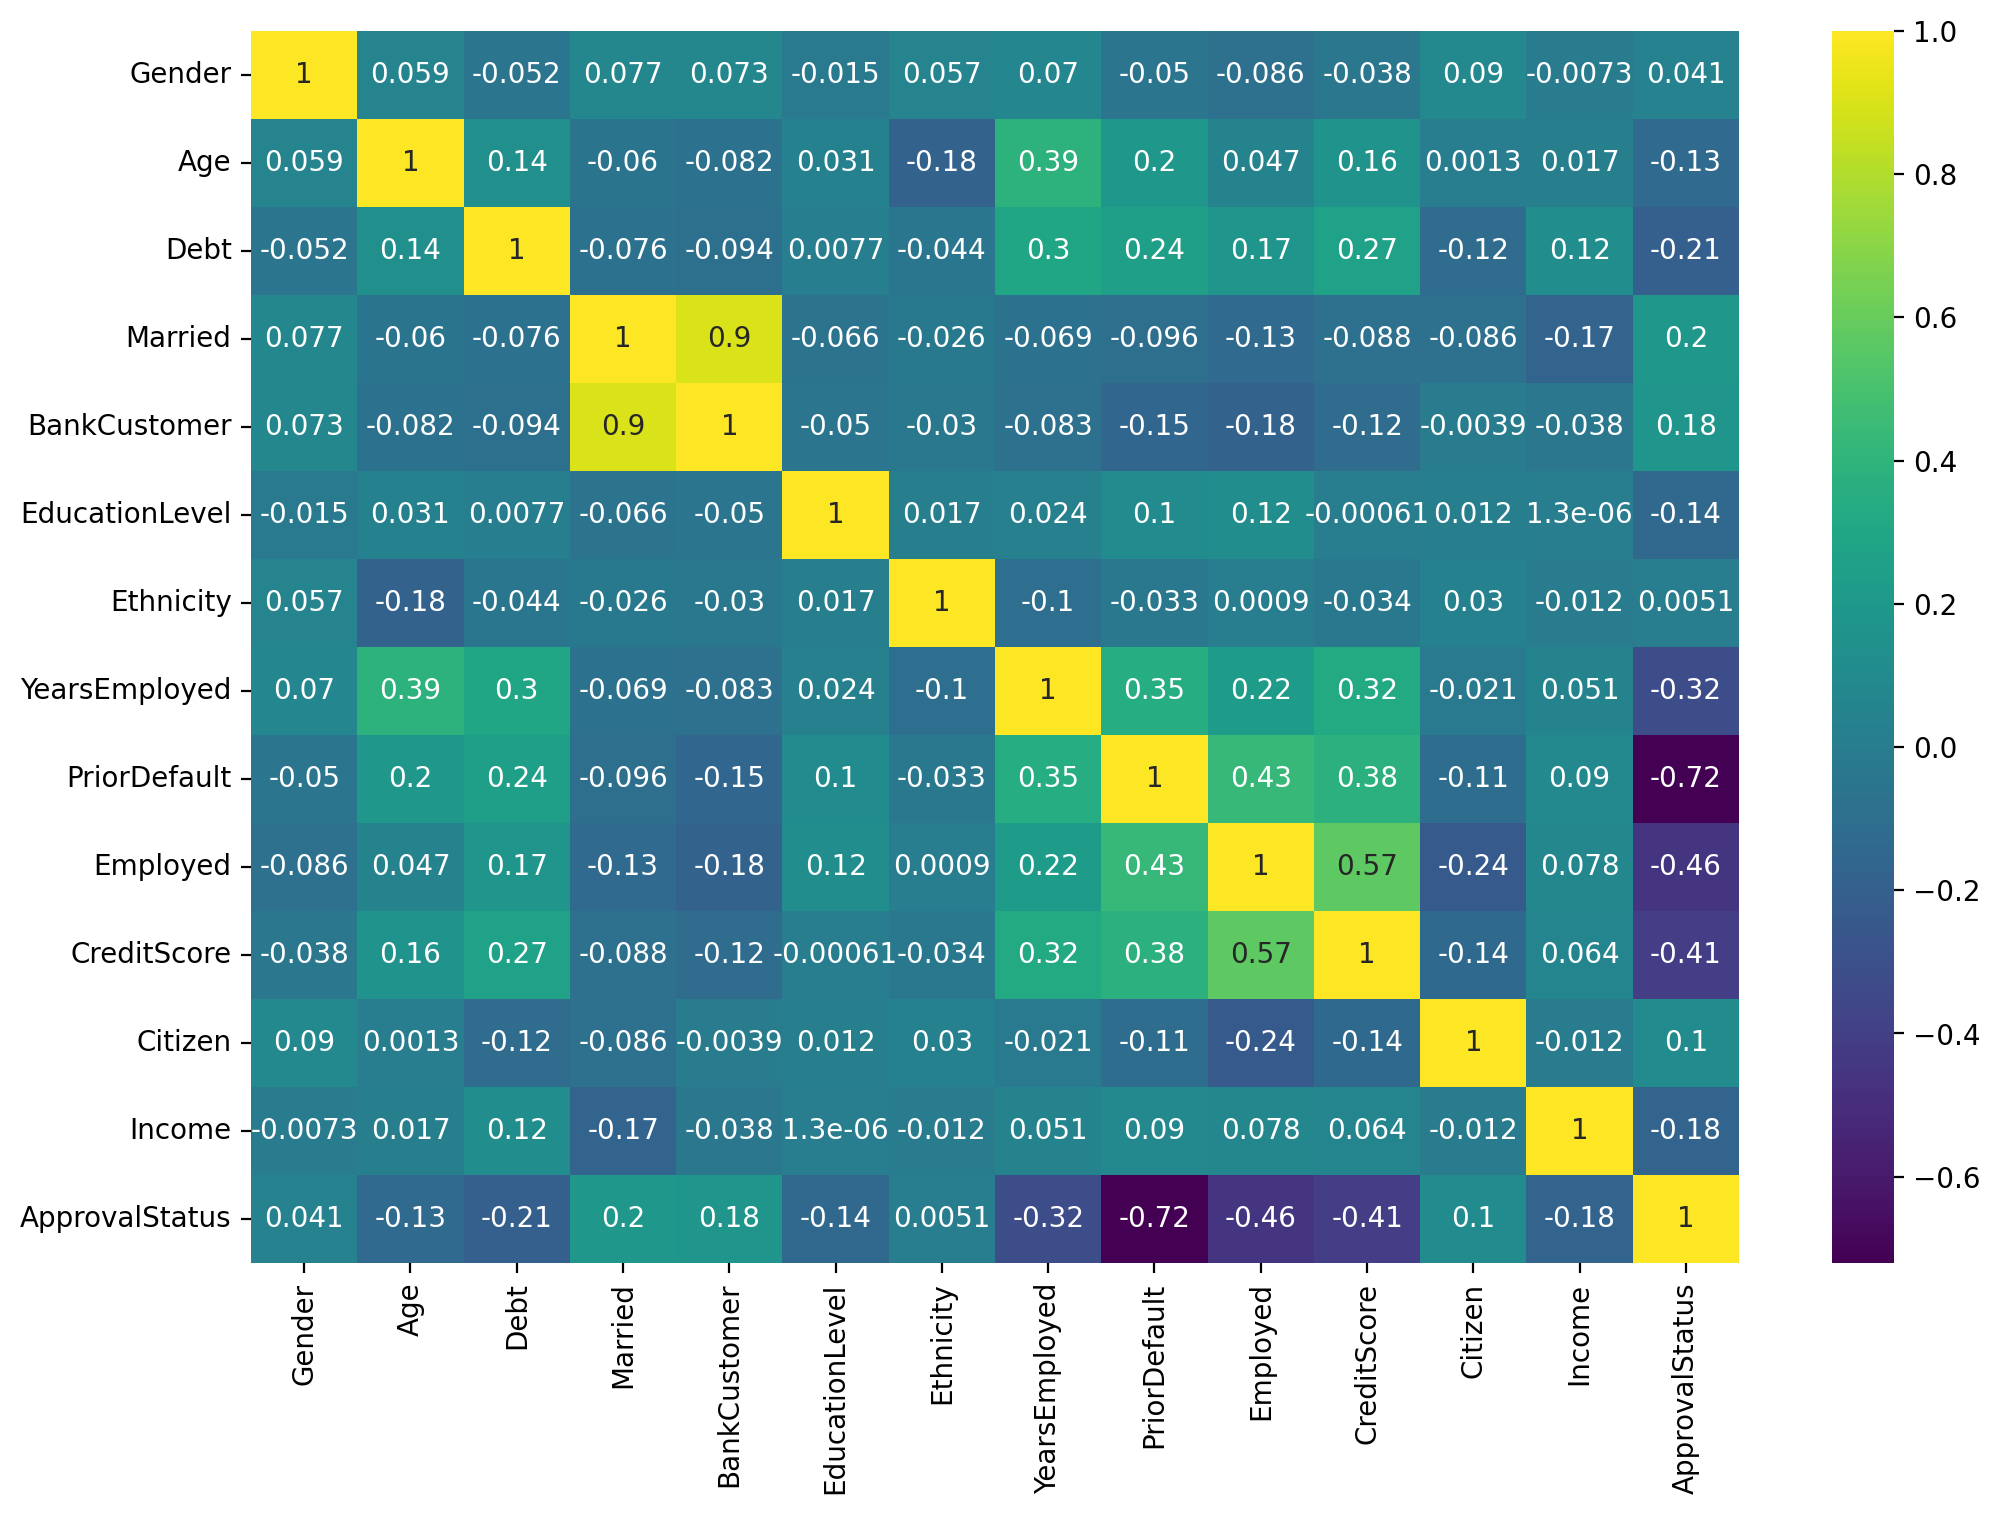

In [22]:
#Data correlation
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(data2.corr(), annot=True, cmap='viridis')

### 6. Machine Learning
#### Train | Test Split and Scaling

In [23]:
X = data2.drop (['ApprovalStatus'], axis=1)
Y = data['ApprovalStatus']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.20, 
                                                    random_state = 700)

In [25]:
len(X_train), len (X_test)

(552, 138)

In [26]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [27]:
S_lr_model = LogisticRegression()
S_lr_model = S_lr_model.fit(scaled_X_train, Y_train)
S_lr_result = S_lr_model.score(scaled_X_test, Y_test)
print("Acuracy: %.4f%%" % (S_lr_result * 100.0))

Acuracy: 84.0580%


### 7. Making predictions and evaluating performance

In [28]:
S_lr_y_pred = S_lr_model.predict(scaled_X_test)
print(confusion_matrix(Y_test, S_lr_y_pred))
print(classification_report(Y_test, S_lr_y_pred))

[[56  8]
 [14 60]]
              precision    recall  f1-score   support

           +       0.80      0.88      0.84        64
           -       0.88      0.81      0.85        74

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138



In [29]:
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol, max_iter = max_iter)

### 8.Finding the best performing model

In [30]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=S_lr_model, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(scaled_X_train, Y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(scaled_X_test,Y_test))

Best: 0.864079 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.8405797101449275
